In [154]:
# Importing Pandas library and the 'olympic_athletes' file
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import warnings

warnings.filterwarnings("ignore")
df = pd.read_csv('olympic_athletes.csv')


##### The code creates a violin plot that visualizes the height distributions of athletes in Gymnastics, Cycling, and Basketball events at the Olympics between 2000 and 2016. The data is first filtered to include only the years between 2000 and 2016 and then duplicates are removed. The resulting dataframe is then subsetted to include only the 'Sport' and 'Height' columns and filtered to drop any rows with missing values. The violin plot is then created using Matplotlib's 'violinplot' function, with separate violins for each sport, and median lines and face colors set for each violin. The plot is then customized with y-axis tick labels and x-axis tick labels representing height values, as well as a title. Finally, the plot is displayed using the 'show' method of the 'pyplot' module of Matplotlib.

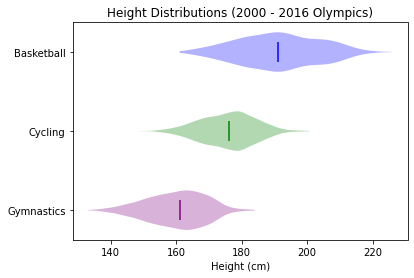

In [141]:
fig, ax = plt.subplots()

# Filtering the years between 2000 and 2016.
final_df = df.loc[(df['Year'] >= 2000) & (df['Year'] <= 2016)]

# Droping duplicates and keeping only the first occurance.
final_df.drop_duplicates(subset=['Name','Height'], keep='first', inplace=True)
final_df = final_df[['Sport','Height']].dropna().reset_index(drop=True)

# Violin plot creation
vp = ax.violinplot([final_df[final_df['Sport']=='Gymnastics']['Height'],
               final_df[final_df['Sport']=='Cycling']['Height'],
               final_df[final_df['Sport']=='Basketball']['Height']],
               showmedians=True, vert=False, showextrema=False)

# Setting the face values for each violin plot
colors = ['purple', 'green', 'blue']
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    
# Setting median value
vp['cmedians'].set_colors(colors)
    
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Gymnastics', 'Cycling', 'Basketball'])
ax.set_xlabel('Height (cm)')
ax.set_xticks([140, 160, 180, 200, 220])
ax.set_xticklabels(['140', '160', '180', '200', '220'])
ax.set_title('Height Distributions (2000 - 2016 Olympics)')

plt.show()

##### The code creates a line plot with shaded areas to show the average height of male and female Olympians in the Summer Olympics over time, along with their standard deviation. The data is first filtered and grouped by year and sex, and then plotted using Matplotlib. 

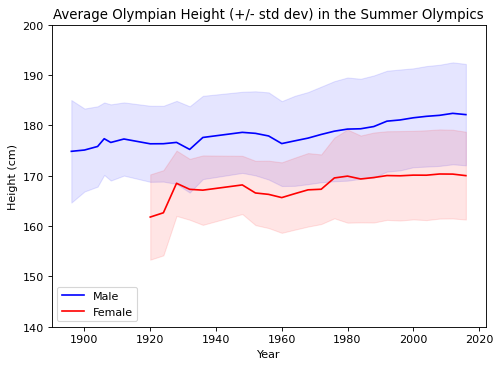

In [173]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(7,5), dpi=80)

# Filtering Summer Olympic games 
summer_df = df[df.Season=='Summer'].drop_duplicates(subset=['Name','Year'], keep='first')

# Group the data by year and sex and calculate mean of height
aggregation = {'Height': ['mean', 'std']}
groupbySex = summer_df.groupby(['Year', 'Sex']).agg(aggregation)
groupbySex.columns = ['MeanHeight', 'StdDevHeight']
groupbySex = groupbySex.reset_index()


# Male and Female data to plot
male_data = groupbySex.loc[groupbySex['Sex'] == 'M']
female_data = groupbySex.loc[groupbySex['Sex'] == 'F']


ax.plot(male_data['Year'], male_data['MeanHeight'], color='blue', label='Male')
ax.fill_between(male_data['Year'], male_data['MeanHeight'] - (1*(male_data['StdDevHeight'])),
                male_data['MeanHeight'] + (1*(male_data['StdDevHeight'])), alpha=0.1, color='blue')
ax.plot(female_data['Year'], female_data['MeanHeight'], color='red', label='Female')
ax.fill_between(female_data['Year'], female_data['MeanHeight'] - (1*(female_data['StdDevHeight'])),
                female_data['MeanHeight'] + (1*(female_data['StdDevHeight'])), alpha=0.1, color='red')


# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Height (cm)')
ax.set_title('Average Olympian Height (+/- std dev) in the Summer Olympics')

ax.set_yticks([140, 150, 160, 170, 180, 190, 200])
ax.set_yticklabels(['140', '150', '160', '170', '180', '190', '200'])

ax.legend(loc='lower left')
plt.show()


##### The code creates a bar graph using data from a dataframe to show the top 10 most decorated Olympians of all time

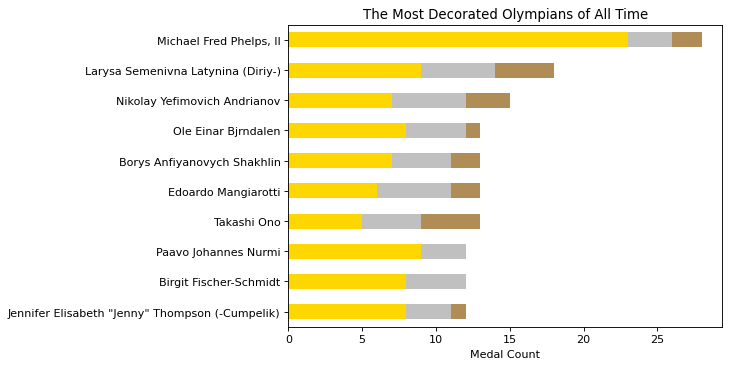

In [162]:
fig, ax = plt.subplots(figsize=(7,5), dpi=80)

# Dropping all the values with "NA"
df.drop(df[df['Medal'] == "NA"].index, inplace = True)

# Using Unstack to count based on the values in the column
medal_counts = df.groupby(['Name', 'Medal'])['Medal'].agg('count').unstack(fill_value=0)

# creating new columns for total number of Gold, Silver, and Bronze medals
medal_counts['TotalGold'] = medal_counts['Gold']
medal_counts['TotalSilver'] = medal_counts['Silver']
medal_counts['TotalBronze'] = medal_counts['Bronze']

# Creating new column to hold the total medals won by each player
aggregation = {'Medal': 'count'}
medal_counts['Total'] = df.groupby('Name').agg(aggregation)

# Getting the Top players
top_10 = medal_counts.sort_values(by=['Total', 'Gold'], ascending=[False, False])
top_10 = top_10.nlargest(10, 'Total')
#Reverse the order of bars
top_10 = top_10.iloc[::-1]

# Bar graph plotting
colors = ['#FFD700', '#C0C0C0', '#B08D57']
top_10 = top_10.drop(['Bronze', 'Gold', 'Silver', 'Total'], axis=1)
top_10.plot(kind='barh', stacked=True,color=colors, ax=ax)
ax.set_xlabel('Medal Count')
ax.set_ylabel('')
ax.set_title('The Most Decorated Olympians of All Time')
ax.legend().set_visible(False)

plt.show()